Aslam Fathin Rahmat

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

df = pd.read_csv("Data_Negara_HELP.csv")
df.set_index("Negara")

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [3]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


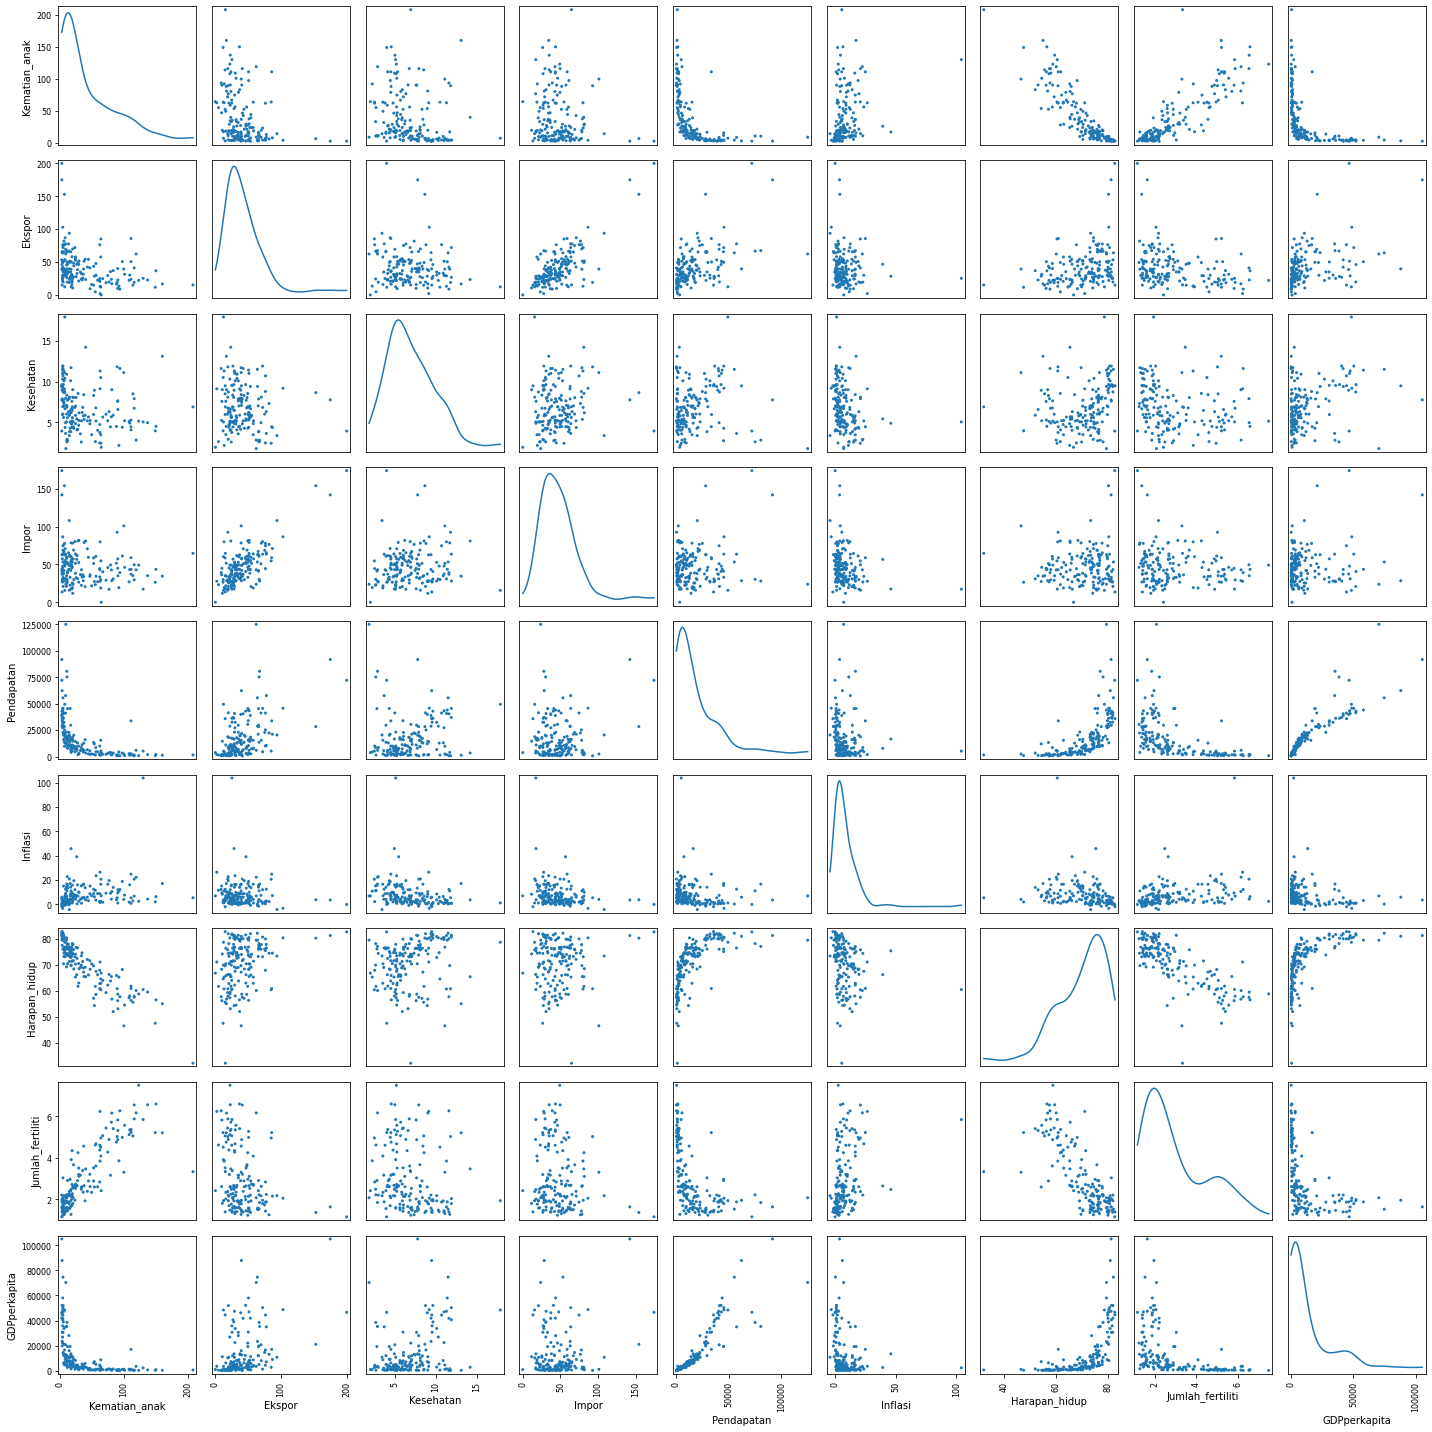

In [4]:
pd.plotting.scatter_matrix(df,alpha=1,diagonal="kde",figsize=(20,20))
plt.tight_layout()
plt.show()

In [5]:
columns_name = list(df.columns)
columns_name.remove("Negara")
print(columns_name)

['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan', 'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']


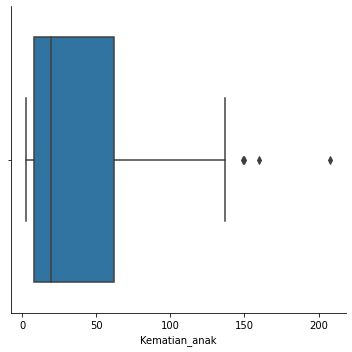

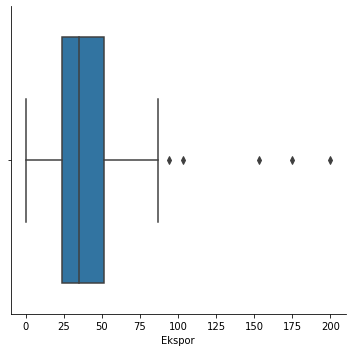

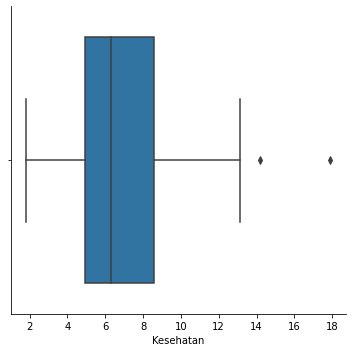

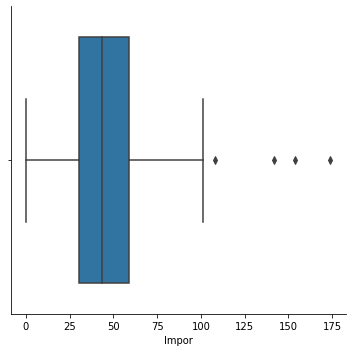

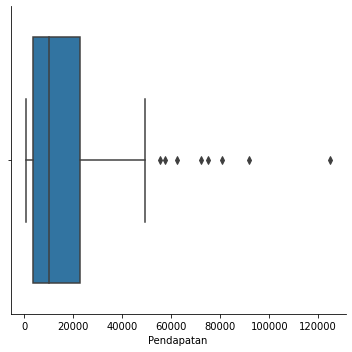

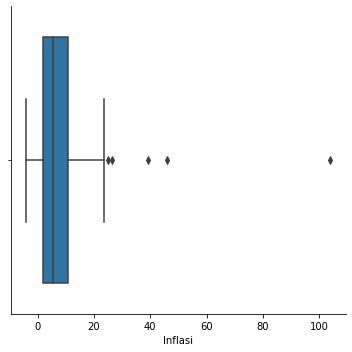

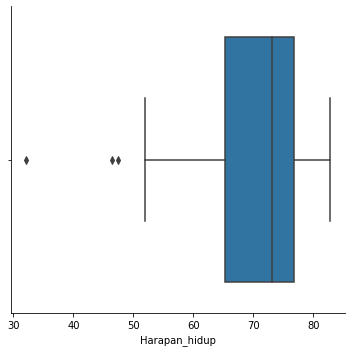

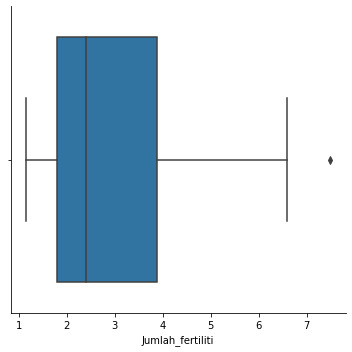

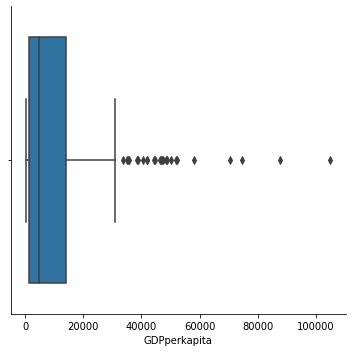

In [6]:
# sns.set(rc = {'figure.figsize':(20,8)})
for i in columns_name :
  sns.catplot(data=df,x=i, kind="box")
plt.show()

## Removing Outliers

In [7]:
df_d = df.describe()
df_d_t = df_d.transpose()
df_q = pd.DataFrame(df_d_t, columns=["25%","75%"])
df_q_t = df_q.transpose()
df_q_t


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
25%,8.25,23.80,4.92,30.20,3355.0,1.81,65.3,1.795,1330.0
75%,62.10,51.35,8.60,58.75,22800.0,10.75,76.8,3.880,14050.0


In [8]:
df_f = df.copy()

for i in columns_name:
  q1 = df_q_t.loc["25%",i]
  q3 = df_q_t.loc["75%",i]
  iqr = q3-q1
  lb = q1-(iqr*1.5)
  ub = q3+(iqr*1.5)
  df_f = df_f[(df_f[i] > lb) & (df_f[i] < ub)]


In [9]:
z_p = np.abs(stats.zscore(df_f["Pendapatan"]))
z_gdp = np.abs(stats.zscore(df_f["GDPperkapita"]))
df_f = df_f[(z_p < 3 ) & (z_gdp < 2)]

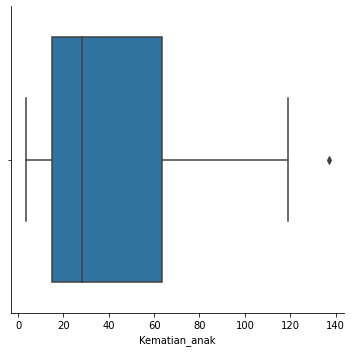

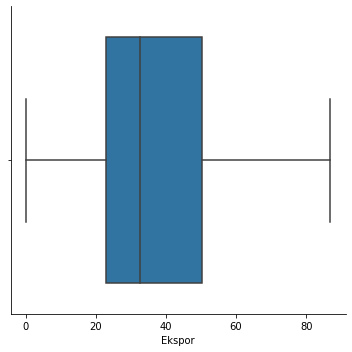

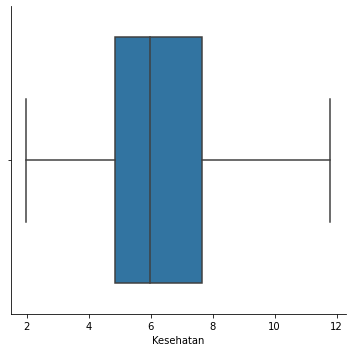

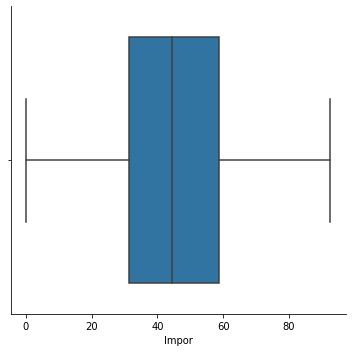

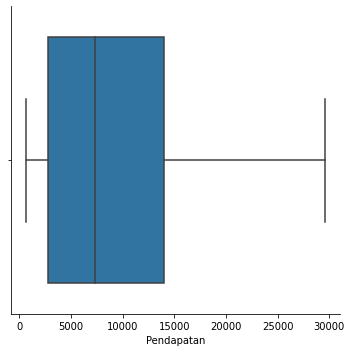

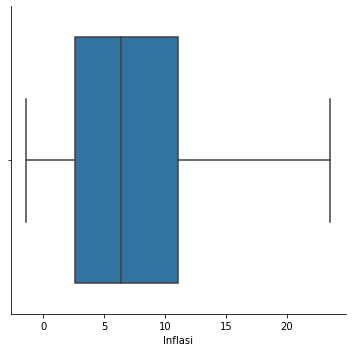

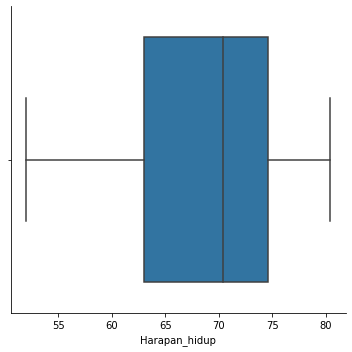

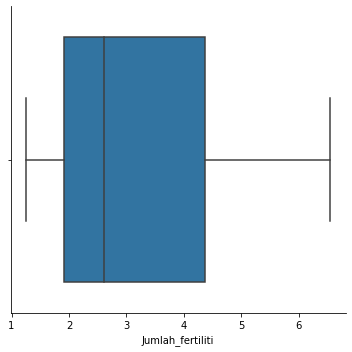

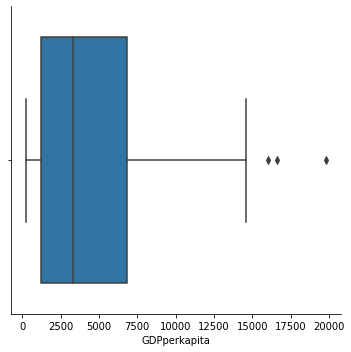

In [11]:
for i in columns_name :
  sns.catplot(data=df_f,x=i, kind="box")
plt.show()

In [12]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            117 non-null    object 
 1   Kematian_anak     117 non-null    float64
 2   Ekspor            117 non-null    float64
 3   Kesehatan         117 non-null    float64
 4   Impor             117 non-null    float64
 5   Pendapatan        117 non-null    int64  
 6   Inflasi           117 non-null    float64
 7   Harapan_hidup     117 non-null    float64
 8   Jumlah_fertiliti  117 non-null    float64
 9   GDPperkapita      117 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 10.1+ KB


In [13]:
df_f_f = df_f.drop(["Negara"], axis=1)
df_f_f.isnull().sum()

Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [14]:
# data = []
# k_list = []

# for k in range(2, 11):
#     kmeans = KMeans(n_clusters = k).fit(df_ka_k)
#     labels = kmeans.labels_
#     data.append(silhouette_score(df_ka_k, labels, metric = 'euclidean'))
#     k_list.append(k)

# plt.plot(k_list,data)
# plt.show()

## Clustering and Comparison

### Kematian Anak

In [15]:
#Parameter yang akan dibandingkan
df_ka_k = df_f_f.loc[0:,["Kematian_anak","Kesehatan"]]
df_ka_gdp = df_f_f.loc[0:,["Kematian_anak","GDPperkapita"]]
df_ka_p = df_f_f.loc[0:,["Kematian_anak","Pendapatan"]]
df_ka_ifr = df_f_f.loc[0:,["Kematian_anak","Inflasi"]]

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

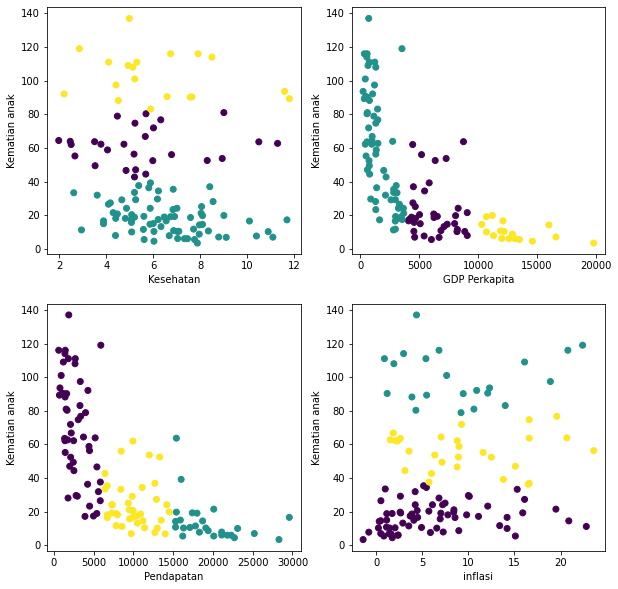

In [16]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(df_ka_k)

fig, ax=plt.subplots(nrows = 2, ncols=2, sharex=False, sharey=False,figsize=(10,10))
ax[0][0].scatter(df_ka_k["Kesehatan"], df_ka_k["Kematian_anak"], c=kmeans1.labels_)
ax[0][0].set_xlabel("Kesehatan")
ax[0][0].set_ylabel("Kematian anak")

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(df_ka_gdp)

ax[0][1].scatter(df_ka_gdp["GDPperkapita"], df_ka_gdp["Kematian_anak"],  c=kmeans2.labels_)
ax[0][1].set_xlabel("GDP Perkapita")
ax[0][1].set_ylabel("Kematian anak")

kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(df_ka_p)

ax[1][0].scatter(df_ka_p["Pendapatan"], df_ka_p["Kematian_anak"],  c=kmeans3.labels_)
ax[1][0].set_xlabel("Pendapatan")
ax[1][0].set_ylabel("Kematian anak")

kmeans4 = KMeans(n_clusters=3)
kmeans4.fit(df_ka_ifr)

ax[1][1].scatter(df_ka_ifr["Inflasi"], df_ka_ifr["Kematian_anak"], c=kmeans4.labels_)
ax[1][1].set_xlabel("inflasi")
ax[1][1].set_ylabel("Kematian anak")

plt.show()

In [17]:
df_f.loc[df_f["Kematian_anak"].idxmax()]

Negara               Mali
Kematian_anak       137.0
Ekspor               22.8
Kesehatan            4.98
Impor                35.1
Pendapatan           1870
Inflasi              4.37
Harapan_hidup        59.5
Jumlah_fertiliti     6.55
GDPperkapita          708
Name: 97, dtype: object

In [18]:
df_f_c1 = df_f.copy()
df_f_c1 = df_f_c1.rank(ascending=0)
df_f_c1.loc[97]

Negara               45.0
Kematian_anak         1.0
Ekspor               87.5
Kesehatan            86.0
Impor                78.0
Pendapatan           98.0
Inflasi              72.0
Harapan_hidup       100.0
Jumlah_fertiliti      1.0
GDPperkapita        100.0
Name: 97, dtype: float64

In [19]:
df_f.loc[df_f["Kematian_anak"].idxmin()]

Negara              Czech Republic
Kematian_anak                  3.4
Ekspor                        66.0
Kesehatan                     7.88
Impor                         62.9
Pendapatan                   28300
Inflasi                      -1.43
Harapan_hidup                 77.5
Jumlah_fertiliti              1.51
GDPperkapita                 19800
Name: 43, dtype: object

In [20]:
df_f_c2 = df_f.copy()
df_f_c2 = df_f_c2.rank(ascending=0)
df_f_c2.loc[43]

Negara               84.0
Kematian_anak       117.0
Ekspor               11.0
Kesehatan            27.0
Impor                19.0
Pendapatan            2.0
Inflasi             117.0
Harapan_hidup         8.0
Jumlah_fertiliti    106.0
GDPperkapita          1.0
Name: 43, dtype: float64

### Kesehatan

In [21]:
#Parameter yang akan dibandingkan
df_k_p = df_f_f.loc[0:,["Kesehatan","Pendapatan"]]
df_k_gdp = df_f_f.loc[0:,["Kesehatan","GDPperkapita"]]
df_k_jf = df_f_f.loc[0:,["Kesehatan","Jumlah_fertiliti"]]
df_k_ifr = df_f_f.loc[0:,["Kesehatan","Inflasi"]]

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

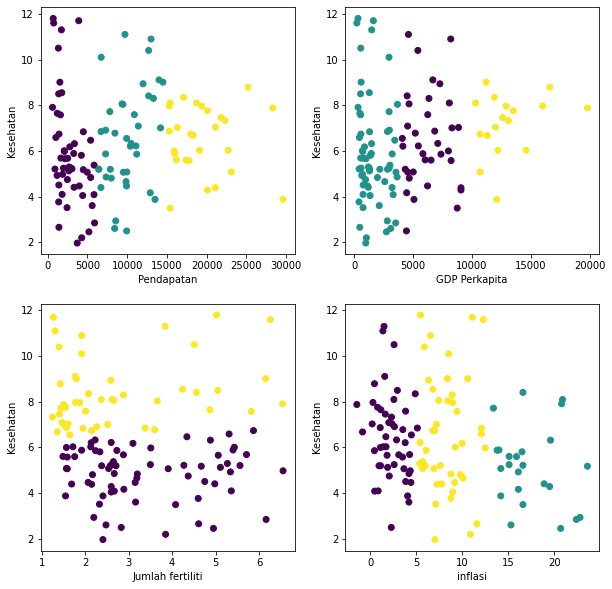

In [35]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(df_k_p)

fig, ax=plt.subplots(nrows = 2, ncols=2, sharex=False, sharey=False,figsize=(10,10))
ax[0][0].scatter(df_k_p["Pendapatan"], df_k_p["Kesehatan"], c=kmeans1.labels_)
ax[0][0].set_xlabel("Pendapatan")
ax[0][0].set_ylabel("Kesehatan")

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(df_k_gdp)

ax[0][1].scatter(df_k_gdp["GDPperkapita"], df_k_gdp["Kesehatan"],  c=kmeans2.labels_)
ax[0][1].set_xlabel("GDP Perkapita")
ax[0][1].set_ylabel("Kesehatan")

kmeans3 = KMeans(n_clusters=2)
kmeans3.fit(df_k_jf)

ax[1][0].scatter(df_k_jf["Jumlah_fertiliti"], df_k_jf["Kesehatan"],  c=kmeans3.labels_)
ax[1][0].set_xlabel("Jumlah fertiliti")
ax[1][0].set_ylabel("Kesehatan")

kmeans4 = KMeans(n_clusters=3)
kmeans4.fit(df_k_ifr)

ax[1][1].scatter(df_k_ifr["Inflasi"], df_k_ifr["Kesehatan"], c=kmeans4.labels_)
ax[1][1].set_xlabel("inflasi")
ax[1][1].set_ylabel("Kesehatan")

plt.show()

In [23]:
df_f.loc[df_f["Kesehatan"].idxmax()]

Negara              Liberia
Kematian_anak          89.3
Ekspor                 19.1
Kesehatan              11.8
Impor                  92.6
Pendapatan              700
Inflasi                5.47
Harapan_hidup          60.8
Jumlah_fertiliti       5.02
GDPperkapita            327
Name: 88, dtype: object

In [24]:
df_f_c1 = df_f.copy()
df_f_c1 = df_f_c1.rank(ascending=0)
df_f_c1.loc[88]

Negara               53.0
Kematian_anak        17.0
Ekspor               99.0
Kesehatan             1.0
Impor                 1.0
Pendapatan          116.0
Inflasi              65.0
Harapan_hidup        95.5
Jumlah_fertiliti     19.0
GDPperkapita        116.0
Name: 88, dtype: float64

In [25]:
df_f.loc[df_f["Kesehatan"].idxmin()]

Negara              Myanmar
Kematian_anak          64.4
Ekspor                0.109
Kesehatan              1.97
Impor                0.0659
Pendapatan             3720
Inflasi                7.04
Harapan_hidup          66.8
Jumlah_fertiliti       2.41
GDPperkapita            988
Name: 107, dtype: object

In [26]:
df_f_c2 = df_f.copy()
df_f_c2 = df_f_c2.rank(ascending=0)
df_f_c2.loc[107]

Negara               38.0
Kematian_anak        27.0
Ekspor              117.0
Kesehatan           117.0
Impor               117.0
Pendapatan           82.0
Inflasi              53.0
Harapan_hidup        76.0
Jumlah_fertiliti     68.5
GDPperkapita         92.0
Name: 107, dtype: float64

In [60]:
df_k_e = df_f_f.loc[0:,["Kesehatan","Ekspor"]]
df_k_i = df_f_f.loc[0:,["Kesehatan","Impor"]]


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Kesehatan')

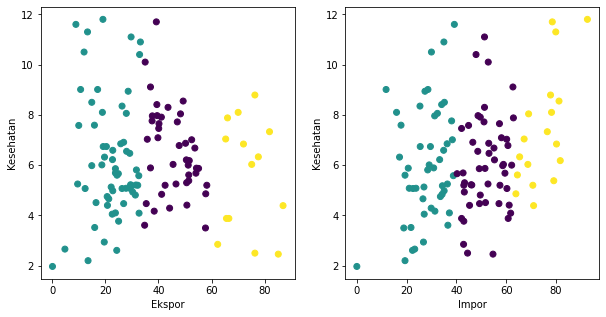

In [62]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(df_k_e)

fig, ax=plt.subplots(nrows = 1, ncols=2, sharex=False, sharey=False,figsize=(10,5))
ax[0].scatter(df_k_e["Ekspor"], df_k_e["Kesehatan"], c=kmeans1.labels_)
ax[0].set_xlabel("Ekspor")
ax[0].set_ylabel("Kesehatan")

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(df_k_i)

ax[1].scatter(df_k_i["Impor"], df_k_i["Kesehatan"],  c=kmeans2.labels_)
ax[1].set_xlabel("Impor")
ax[1].set_ylabel("Kesehatan")

### Pendapatan

In [45]:
#Parameter yang akan dibandingkan
df_p_e = df_f_f.loc[0:,["Pendapatan","Ekspor"]]
df_p_i = df_f_f.loc[0:,["Pendapatan","Impor"]]
df_p_hh = df_f_f.loc[0:,["Pendapatan","Harapan_hidup"]]
df_p_gdp = df_f_f.loc[0:,["Pendapatan","GDPperkapita"]]

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

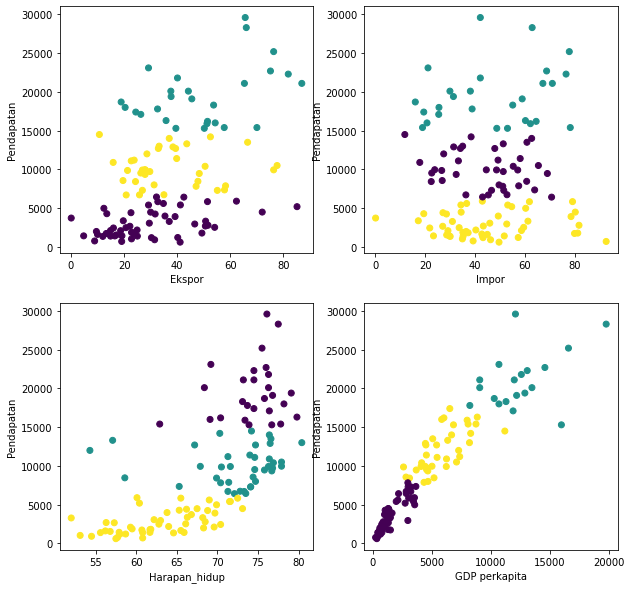

In [53]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(df_p_e)

fig, ax=plt.subplots(nrows = 2, ncols=2, sharex=False, sharey=False,figsize=(10,10))
ax[0][0].scatter(df_p_e["Ekspor"], df_p_e["Pendapatan"], c=kmeans1.labels_)
ax[0][0].set_xlabel("Ekspor")
ax[0][0].set_ylabel("Pendapatan")

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(df_p_i)

ax[0][1].scatter(df_p_i["Impor"], df_p_i["Pendapatan"],  c=kmeans2.labels_)
ax[0][1].set_xlabel("Impor")
ax[0][1].set_ylabel("Pendapatan")

kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(df_p_hh)

ax[1][0].scatter(df_p_hh["Harapan_hidup"], df_p_hh["Pendapatan"],  c=kmeans3.labels_)
ax[1][0].set_xlabel("Harapan_hidup")
ax[1][0].set_ylabel("Pendapatan")

kmeans4 = KMeans(n_clusters=3)
kmeans4.fit(df_p_gdp)

ax[1][1].scatter(df_p_gdp["GDPperkapita"], df_p_gdp["Pendapatan"], c=kmeans4.labels_)
ax[1][1].set_xlabel("GDP perkapita")
ax[1][1].set_ylabel("Pendapatan")

plt.show()

In [54]:
df_f.loc[df_f["Pendapatan"].idxmax()]

Negara              Libya
Kematian_anak        16.6
Ekspor               65.6
Kesehatan            3.88
Impor                42.1
Pendapatan          29600
Inflasi              14.2
Harapan_hidup        76.1
Jumlah_fertiliti     2.41
GDPperkapita        12100
Name: 89, dtype: object

In [55]:
df_f_c1 = df_f.copy()
df_f_c1 = df_f_c1.rank(ascending=0)
df_f_c1.loc[89]

Negara               52.0
Kematian_anak        84.5
Ekspor               12.0
Kesehatan           104.5
Impor                66.5
Pendapatan            1.0
Inflasi              20.5
Harapan_hidup        22.0
Jumlah_fertiliti     68.5
GDPperkapita         10.0
Name: 89, dtype: float64

In [56]:
df_f.loc[df_f["Pendapatan"].idxmin()]

Negara              Congo, Dem. Rep.
Kematian_anak                  116.0
Ekspor                          41.1
Kesehatan                       7.91
Impor                           49.6
Pendapatan                       609
Inflasi                         20.8
Harapan_hidup                   57.5
Jumlah_fertiliti                6.54
GDPperkapita                     334
Name: 37, dtype: object

In [57]:
df_f_c2 = df_f.copy()
df_f_c2 = df_f_c2.rank(ascending=0)
df_f_c2.loc[37]

Negara               89.0
Kematian_anak         3.5
Ekspor               41.0
Kesehatan            26.0
Impor                47.5
Pendapatan          117.0
Inflasi               5.0
Harapan_hidup       107.0
Jumlah_fertiliti      2.0
GDPperkapita        115.0
Name: 37, dtype: float64

## Analysis

In [64]:
a=[]
arr_a = [df_f.loc[37],df_f.loc[107],df_f.loc[97]]
list_a = list(arr_a)
df_a = pd.DataFrame(list_a, index=["Congo","Myanmar","Mali"])
df_a = df_a.transpose()

df_ket = {"Congo":"Pendapatan terendah",
          "Myanmar":"Kesehatan terendah",
          "Mali":"Kematian anak tertinggi"}
df_a.loc["Keterangan"] = df_ket
df_a

,Congo,Myanmar,Mali
Negara,"Congo, Dem. Rep.",Myanmar,Mali
Kematian_anak,116.0,64.4,137.0
Ekspor,41.1,0.109,22.8
Kesehatan,7.91,1.97,4.98
Impor,49.6,0.0659,35.1
Pendapatan,609,3720,1870
Inflasi,20.8,7.04,4.37
Harapan_hidup,57.5,66.8,59.5
Jumlah_fertiliti,6.54,2.41,6.55
GDPperkapita,334,988,708


In [59]:
#Rank tertinggi = 1, rank terendah = 117
a=[]
arr_a = [df_f_c2.loc[37],df_f_c2.loc[107],df_f_c2.loc[97]]
list_a = list(arr_a)
df_a = pd.DataFrame(list_a, index=["Congo","Myanmar","Mali"])
df_a = df_a.transpose()

df_ket = {"Congo":"Pendapatan terendah",
          "Myanmar":"Kesehatan terendah",
          "Mali":"Kematian anak tertinggi"}
df_a.loc["Keterangan"] = df_ket
df_a

,Congo,Myanmar,Mali
Negara,89.0,38.0,45.0
Kematian_anak,3.5,27.0,1.0
Ekspor,41.0,117.0,87.5
Kesehatan,26.0,117.0,86.0
Impor,47.5,117.0,78.0
Pendapatan,117.0,82.0,98.0
Inflasi,5.0,53.0,72.0
Harapan_hidup,107.0,76.0,100.0
Jumlah_fertiliti,2.0,68.5,1.0
GDPperkapita,115.0,92.0,100.0
